In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import r2_score, accuracy_score
from pyspark.sql import SparkSession
import pandas as pd
from pandas.api.types import is_numeric_dtype as is_num
import numpy as np
import matplotlib.pyplot as plt

In [7]:
spark = SparkSession.builder.appName("AIProject").config("spark.driver.memory", "4g").getOrCreate()
data_frame = spark.read.csv('./datasets/training_dataset.csv', header=True, inferSchema=True)
df = data_frame.limit(50000).toPandas()

In [8]:
df = df.dropna()

df['store_and_fwd_flag'].replace(['N', 'Y'], [1, 2], inplace=True)

# TODO: Fix drops
df = df.drop('ID', axis=1)
df = df.drop('vendorid', axis=1)
df = df.drop('tpep_pickup_datetime', axis=1)
df = df.drop('tpep_dropoff_datetime', axis=1)
#df = df.drop('payment_type', axis=1)

df

C:\Users\tuvab\AppData\Local\Temp\ipykernel_1716\2759738888.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['store_and_fwd_flag'].replace(['N', 'Y'], [1, 2], inplace=True)
C:\Users\tuvab\AppData\Local\Temp\ipykernel_1716\2759738888.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['store

,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1.0,4.16,1.0,1,144,142,1,31.0,1.0,0.5,6.00,0.0,1.0,42.00,2.5,0.0,2116.0
1,1.0,1.03,1.0,1,144,79,1,10.0,1.0,0.5,2.00,0.0,1.0,17.00,2.5,0.0,549.0
2,2.0,0.62,1.0,1,230,186,2,-5.8,0.0,-0.5,0.00,0.0,-1.0,-9.80,-2.5,0.0,253.0
3,1.0,1.41,1.0,1,113,4,1,12.1,1.0,0.5,2.00,0.0,1.0,19.10,2.5,0.0,769.0
4,1.0,2.06,1.0,1,161,237,1,17.0,0.0,0.5,4.20,0.0,1.0,25.20,2.5,0.0,1110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.0,2.50,1.0,1,236,143,1,17.7,2.5,0.5,2.00,0.0,1.0,26.20,2.5,0.0,1166.0
49996,1.0,0.62,1.0,1,262,263,2,7.2,0.0,0.5,0.00,0.0,1.0,11.20,2.5,0.0,388.0
49997,1.0,1.90,1.0,1,237,164,2,21.2,2.5,0.5,0.00,0.0,1.0,25.20,2.5,0.0,1623.0
49998,1.0,1.24,1.0,1,162,170,1,14.9,0.0,0.5,2.00,0.0,1.0,20.90,2.5,0.0,987.0


In [11]:
numeric_columns = [
    "passenger_count", "trip_distance", "pulocationid", "dolocationid",
    "ratecodeid", "fare_amount", "extra", "mta_tax", "improvement_surcharge",
    "tip_amount", "tolls_amount", "total_amount", "congestion_surcharge", "airport_fee", "duration"
]

for col in numeric_columns:
    assert is_num(df[col])

In [12]:
x = df.iloc[:, :-1]
y = df["duration"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
print(x.shape)
print(y.shape)

(45198, 16)
(45198,)


In [11]:
lin_mod = LinearRegression()

lin_mod.fit(x_train, y_train)

y_pred_lin_mod = lin_mod.predict(x_test)

print(r2_score(y_test, y_pred_lin_mod))

0.13036802139353887


In [12]:
n_cv = 2

In [26]:
# TODO: Fix, did not converge
# maybe increase number of iterations
# 4 min 12 sec
log_mod = LogisticRegression(max_iter=200)

log_mod.fit(x_train, y_train)

y_pred_log_mod = log_mod.predict(x_test)

print(accuracy_score(y_test, y_pred_log_mod))

KeyboardInterrupt: 

In [ ]:
ranf_mod = RandomForestRegressor(random_state=42)

# print(np.mean(cross_val_score(ranf_mod, x, y, cv=n_cv)))
ranf_mod.fit(x_train, y_train)
y_pred_ranf = ranf_mod.predict(x_test)
# ranf_mod.score(x_test, y_test)

print(r2_score(y_test, y_pred_ranf))


-0.014760371482169132


0.0012272696889431556


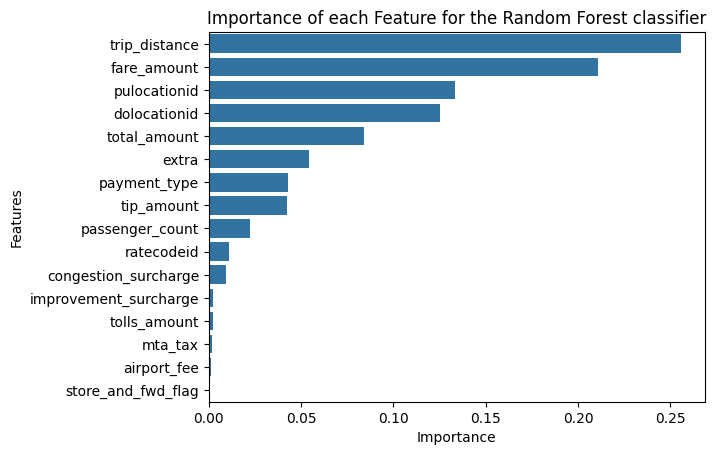

In [ ]:
ranf_mod = RandomForestRegressor(random_state=42)
ranf_mod.fit(x_train, y_train)

y_pred_ranf = ranf_mod.predict(x_test)
print(r2_score(y_test, y_pred_ranf))


feature_scores = pd.Series(ranf_mod.feature_importances_, index = x_train.columns).sort_values(ascending = False)

import seaborn as sns
sns.barplot(x=feature_scores, y=feature_scores.index, )
plt.title("Importance of each Feature for the Random Forest classifier")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()




0.007282987228624083


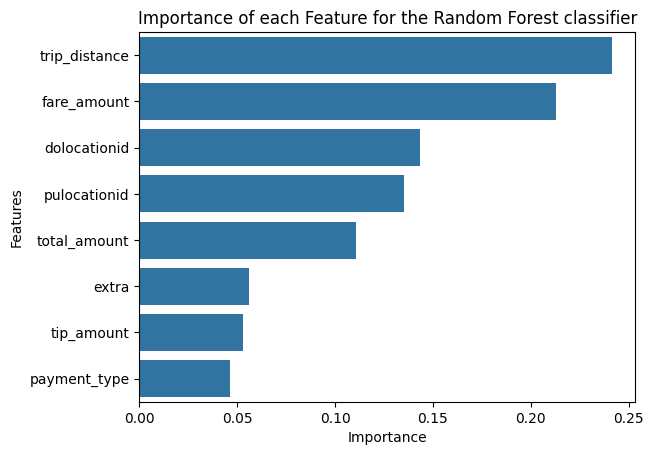

In [25]:
df = df.drop('store_and_fwd_flag', axis=1)
df = df.drop('airport_fee', axis=1)
df = df.drop('mta_tax', axis=1)
df = df.drop('tolls_amount', axis=1)
df = df.drop('improvement_surcharge', axis=1)
df = df.drop('congestion_surcharge', axis=1)
df = df.drop('ratecodeid', axis=1)
df = df.drop('passenger_count', axis=1)

x = df.iloc[:, :-1]
y = df["duration"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

ranf_mod = RandomForestRegressor(random_state=42)
ranf_mod.fit(x_train, y_train)

y_pred_ranf = ranf_mod.predict(x_test)
print(r2_score(y_test, y_pred_ranf))

feature_scores = pd.Series(ranf_mod.feature_importances_, index = x_train.columns).sort_values(ascending = False)

import seaborn as sns
sns.barplot(x=feature_scores, y=feature_scores.index, )
plt.title("Importance of each Feature for the Random Forest classifier")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()



In [28]:
svr_mod = SVR()

# print(np.mean(cross_val_score(svr_mod, x, y, cv=n_cv)))

svr_mod.fit(x_train, y_train)
y_pred_svr = svr_mod.predict(x_test)

# print(svr_mod.score(x_test, y_test))

print(r2_score(y_test, y_pred_svr))

#plt.scatter(y_test, y_pred_svr)

0.07792052602450372


In [ ]:
linsvr_mod = LinearSVR(random_state=42)

# print(np.mean(cross_val_score(linsvr_mod, x, y, cv=n_cv)))

linsvr_mod.fit(x_train, y_train)
# y_pred_lin_svr = linsvr_mod.predict(x_test)

# print(r2_score(y_test, y_pred_lin_svr))

print(linsvr_mod.score())

-0.05505019221725149


c:\Users\William\anaconda3\envs\intro_ml_project\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
kneigh_mod = KNeighborsRegressor()

# print(np.mean(cross_val_score(kneigh_mod, x, y, cv=n_cv)))



In [ ]:
tree_mod = DecisionTreeClassifier()

print(np.mean(cross_val_score(tree_mod, x, y, cv=n_cv)))